In [1]:
import os
import cv2
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt
import numpy as np

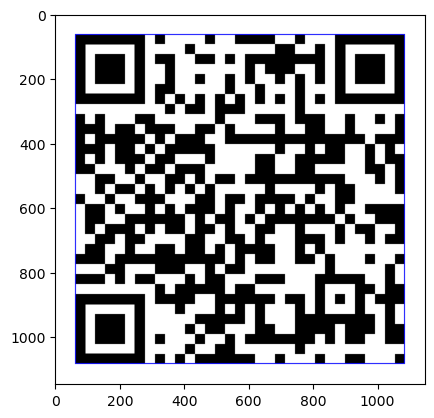

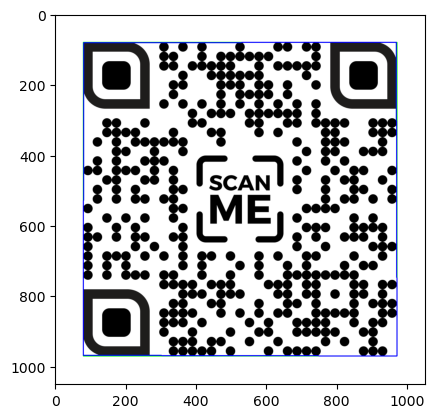

In [2]:
input_dir = 'QR Data/'

for j in sorted(os.listdir(input_dir)):
    img_path = os.path.join(input_dir, j)
    
    # Skip non-image files
    if not img_path.endswith(('.jpg', '.jpeg', '.png')):
        continue

    img = cv2.imread(img_path)

    # Skip invalid or unsupported images
    if img is None:
        print(f"Error reading image: {img_path}")
        continue

    qr_info = decode(img)

    for qr in qr_info:
        data = qr.data.decode()
        rect = qr.rect
        polygon = qr.polygon

        img = cv2.rectangle(img, (rect.left, rect.top), (rect.left + rect.width, rect.top + rect.height), (0, 255, 0), 2)
        img = cv2.polylines(img, [np.array(polygon)], True, (255, 0, 0), 2)

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()